In [54]:
import pandas as pd
import json 
import numpy as np
from pandas.io.json import json_normalize

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Stats test
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [55]:
def t_test_function(df,var1,var2):
    '''t-test to see if a difference in percentage by variables is statistically significant. '''
    df1 = df[df[var1] == True]
    df2 = df[df[var1] == False]
    return ttest_ind(df1[[var2]],df2[[var2]])

In [56]:
def chi_cont_func(df, col1,col2):
    '''Chi-Squared test to find statistical significance for varied categorical data'''
    a=df[df[col1]==0].groupby(col2)[[col1]].count()
    b= df[df[col1]==1].groupby(col2)[[col1]].count()
    data_array= np.concatenate((a.values.T,b.values.T),axis=0)
    return chi2_contingency(data_array)

# Part 1

In [10]:
# read in the data from the json logins file 
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [11]:
# Check that Pandas has correctly importated the data in datetime format
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


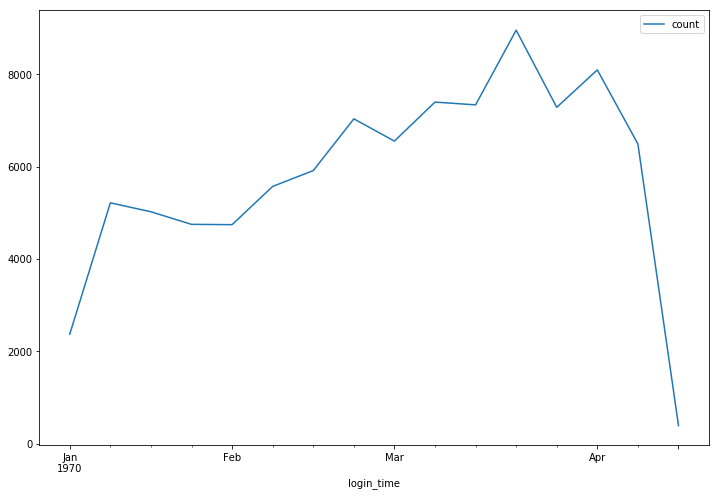

In [14]:
logins_df = pd.read_json('logins.json')
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_week=logins_df.resample('1W').sum()
logins_week.plot(figsize=(12,8))

In [15]:
logins_df = pd.read_json('logins.json')
#logins_df["time"] = logins_df["login_time"].dt.time
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_15min=logins_df.resample('15T').sum().reset_index()

In [16]:

logins_15min["time"] = logins_15min["login_time"].dt.time
logins_15min.head()

,login_time,count,time
0,1970-01-01 20:00:00,2,20:00:00
1,1970-01-01 20:15:00,6,20:15:00
2,1970-01-01 20:30:00,9,20:30:00
3,1970-01-01 20:45:00,7,20:45:00
4,1970-01-01 21:00:00,1,21:00:00


In [17]:
every_15 = logins_15min.groupby('time')["count"].sum().to_frame()

In [18]:
every_15.head(50)

,count
time,
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549
01:15:00,1598
01:30:00,1673
01:45:00,1497
02:00:00,1509


In [19]:
every_15.tail(46)

,count
time,
12:30:00,1334
12:45:00,1051
13:00:00,898
13:15:00,870
13:30:00,942
13:45:00,901
14:00:00,730
14:15:00,793
14:30:00,1008


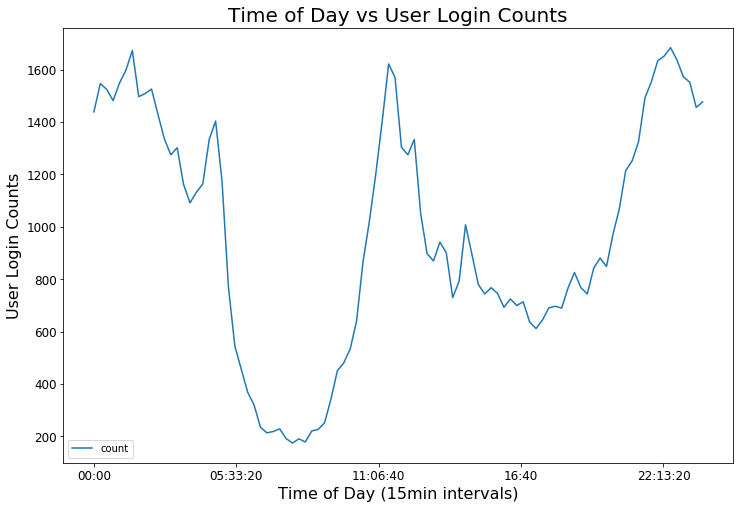

In [24]:
# daily pattern aggregated by 15min intervals. 
every_15.plot(figsize=(12,8))
plt.title("Time of Day vs User Login Counts",fontsize=20)
plt.ylabel("User Login Counts",fontsize=16)
plt.xlabel("Time of Day (15min intervals)",fontsize=16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()


In [22]:
logins_df = pd.read_json('logins.json')
logins_df["day_of_week"] = logins_df['login_time'].dt.weekday_name
logins_df.day_of_week.value_counts()

Saturday     19377
Sunday       18167
Friday       15208
Thursday     11960
Wednesday    10339
Tuesday       9268
Monday        8823
Name: day_of_week, dtype: int64

# Part 3

In [32]:
data= json.load((open('ultimate_data_challenge.json')))
data_df = pd.DataFrame(data)
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [33]:
data_df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [34]:
data_df.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [35]:
data_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [36]:
data_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [37]:
data_df['last_trip_date'] = pd.to_datetime(data_df['last_trip_date'])
data_df['signup_date'] = pd.to_datetime(data_df['signup_date'])

In [38]:
data_df['signup_date'].min()

Timestamp('2014-01-01 00:00:00')

In [39]:
data_df['signup_date'].max()

Timestamp('2014-01-31 00:00:00')

In [40]:
data_df['last_trip_date'].min()

Timestamp('2014-01-01 00:00:00')

In [41]:
data_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [42]:
data_df['signup_date'].min() + pd.Timedelta('180 days')


Timestamp('2014-06-30 00:00:00')

#### The definition of active user, having taken a trip in the past 30 days could either be done on an individual basis or done for the collective when looking at these users 6th month of usage. For simplicy, we defined active users here as simply have a last trip date more recent than 2014-06-01. 

In [44]:
# create a column to indicate active users
data_df['active_2'] = data_df['last_trip_date'] > '2014-06-01 00:00:00'

#### a customer is active if their last trip is in the month of May, June or July 1st 

In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active_2                  50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.3+ MB


### We don't have any obviously incorrect data but we do have some missing data in the primary device column, the avg_rating_by_driver and avg_rating_of_driver. We will investigate this more to see what to do. 

In [57]:
data_df[~(data_df["phone"].isin(['iPhone','Android']))].head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_2
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0,True
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0,False
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0,False
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3,True
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7,True
434,5.09,4.4,4.8,1.13,King's Landing,2014-06-25,None,2014-01-23,14.3,3,False,85.7,True
494,2.59,4.9,5.0,1.03,Astapor,2014-06-10,None,2014-01-24,10.5,1,False,94.7,True
532,7.21,4.5,5.0,1.06,King's Landing,2014-06-27,None,2014-01-11,7.7,0,True,51.3,True
534,129.89,5.0,NaN,1.00,King's Landing,2014-03-09,None,2014-01-04,0.0,0,False,0.0,False
611,3.01,3.5,5.0,1.04,Astapor,2014-03-01,None,2014-01-17,16.7,5,False,83.3,False


## To clean up the data we will require a cell phone preference and remove the NaN rows. 

In [49]:
data_clean=data_df[(data_df["phone"].isin(['iPhone','Android']))]

In [50]:
data_clean = data_clean.dropna()

In [51]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
active_2                  41445 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.9+ MB


In [52]:
data_clean["active_2"].mean()* 100

40.07238508867174

## Evalute variables

In [48]:
data_clean.groupby("active_2")[["ultimate_black_user"]].mean()* 100

,ultimate_black_user
active_2,
False,29.572815
True,51.625723


In [59]:
t_test_function(data_clean,'active_2','ultimate_black_user')

Ttest_indResult(statistic=array([46.39212967]), pvalue=array([0.]))

#### The difference in being an ultimate black user in the first month and then being active in the 6th month is over 22% and the p-value from our t-test is < 0.001 which shows this is a good predictive feature. 

In [51]:
data_clean.groupby("active_2")[["avg_dist"]].mean()

,avg_dist
active_2,
False,5.824816
True,4.914539


In [52]:
data_clean.groupby("active_2")[["avg_rating_by_driver"]].mean()

,avg_rating_by_driver
active_2,
False,4.787853
True,4.759387


In [53]:
data_clean.groupby("active_2")[["avg_rating_of_driver"]].mean()

,avg_rating_of_driver
active_2,
False,4.607219
True,4.593497


In [54]:
data_clean.groupby("active_2")[["avg_surge"]].mean()

,avg_surge
active_2,
False,1.074619
True,1.072629


In [55]:
data_clean.groupby("city")[["active_2"]].mean() *100

,active_2
city,
Astapor,26.974610
King's Landing,64.809117
Winterfell,37.978185


In [61]:
chi_cont_func(df=data_clean, col1='active_2',col2='city')

(3235.9719311011586,
 0.0,
 2,
 array([[ 8095.62149837,  5258.64820847, 11482.73029316],
        [ 5413.37850163,  3516.35179153,  7678.26970684]]))

#### The connection between retained customers and the city the user signed up in is very significant, and the p-value of our chi squared test is less than 0.001 so this difference is statistically valid. 

In [58]:
data_clean.groupby("phone")[["active_2"]].mean() *100

,active_2
phone,
Android,21.772926
iPhone,47.611747


In [64]:
chi_cont_func(df=data_clean, col1='active_2',col2='phone')

(2379.997613462585, 0.0, 1, array([[ 7247.04647123, 17589.95352877],
        [ 4845.95352877, 11762.04647123]]))

#### The connection between retained customers and the main phone used is very significant, and the p-value of our chi squared test is less than 0.001 so this difference is statistically valid. 

In [60]:
data_clean.groupby("active_2")[["weekday_pct"]].mean()

,weekday_pct
active_2,
False,60.498675
True,62.385814


In [61]:
data_clean.groupby("active_2")[["trips_in_first_30_days"]].mean()

,trips_in_first_30_days
active_2,
False,1.935661
True,3.617654


### The top predicting factors based on initial analysis is that the number of trips in the first 30 days, ultimate_black_user,  the phone type preference and the city the user signed up in are the highest predicting factors for being active in the 6th month. 

In [63]:
data_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,active_2
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,True,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False,False


In [64]:
data_clean.groupby("trips_in_first_30_days")["active_2"].mean()


trips_in_first_30_days
0      0.369663
1      0.271275
2      0.355004
3      0.434572
4      0.503739
5      0.563591
6      0.570035
7      0.584767
8      0.652397
9      0.693617
10     0.722543
11     0.710438
12     0.729358
13     0.702381
14     0.687500
15     0.720779
16     0.754717
17     0.663717
18     0.762500
19     0.779412
20     0.803922
21     0.789474
22     0.735294
23     0.795455
24     0.787879
25     0.842105
26     0.684211
27     0.925926
28     0.857143
29     0.666667
30     0.666667
31     0.833333
32     0.875000
33     0.777778
34     0.818182
35     1.000000
36     0.333333
37     0.777778
38     0.750000
39     0.333333
40     0.800000
41     1.000000
42     1.000000
43     0.750000
44     0.600000
47     0.666667
48     1.000000
49     1.000000
50     0.000000
51     0.000000
53     0.500000
54     1.000000
55     1.000000
56     0.500000
58     1.000000
63     1.000000
71     1.000000
73     0.000000
125    1.000000
Name: active_2, dtype: float64

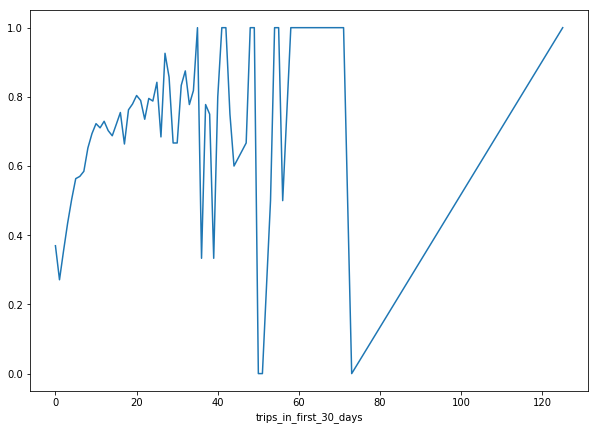

In [72]:
data_clean.groupby("trips_in_first_30_days")["active_2"].mean().plot(figsize=(10,7))

plt.show()

In [67]:
def bin_(df):
    '''Creates a function to turn Percent Uppercase into 4 binned groups'''
                        
    col="trips_in_first_30_days"
    if df[col]   <3:
        return 1
    elif df[col] <4:
        return 2
    elif df[col] <8:
        return 3
    else:
        return 4

In [68]:
data_clean["trips_binned"] = data_clean.apply(bin_,axis=1)

In [69]:
data_clean.groupby("trips_binned")["active_2"].mean()

trips_binned
1    0.331684
2    0.434572
3    0.542632
4    0.710752
Name: active_2, dtype: float64

In [70]:
chi_cont_func(df=data_clean, col1='active_2',col2='trips_binned')

(2355.649298972978,
 0.0,
 3,
 array([[17073.97676439,  2225.71161781,  3647.79391965,  1889.51769815],
        [11417.02323561,  1488.28838219,  2439.20608035,  1263.48230185]]))

####  Binning the average trips_in_first_30_day into 0-2, 3, 4-7 and >8 we found huge differences in the percent of users retained and a chi-squared test had a p-value >0.001 

In [71]:
data_clean.groupby("trips_binned")["city"].count()

trips_binned
1    28491
2     3714
3     6087
4     3153
Name: city, dtype: int64

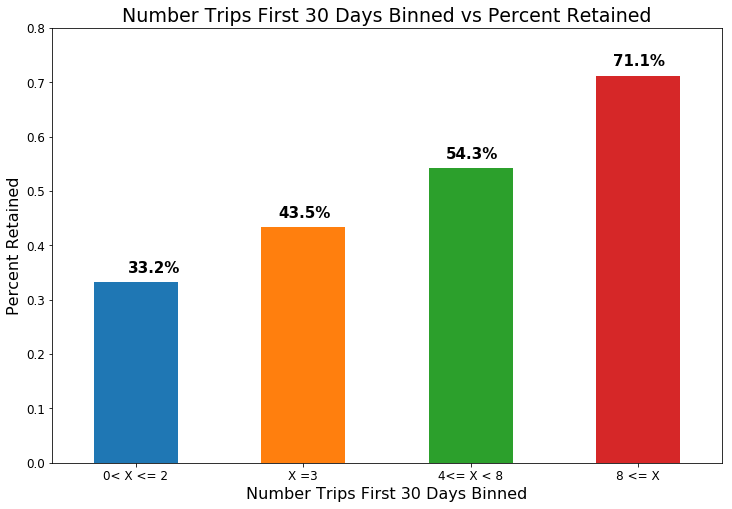

In [95]:
# plot the binned groups
ax=data_clean.groupby("trips_binned")["active_2"].mean().plot(kind="bar",figsize=(12,8))

ax.text(-0.05 , 0.35  , "33.2%", fontweight='bold', fontsize=15)
ax.text(0.85 , 0.45  , "43.5%", fontweight='bold', fontsize=15)
ax.text(1.85 , 0.56  , "54.3%", fontweight='bold', fontsize=15)
ax.text(2.85 , 0.73  , "71.1%", fontweight='bold', fontsize=15)
plt.ylim(0,0.8)
plt.title("Number Trips First 30 Days Binned vs Percent Retained",fontsize=19)
plt.ylabel("Percent Retained",fontsize=16)
plt.xlabel("Number Trips First 30 Days Binned",fontsize=16)
plt.xticks([0,1,2,3],["0< X <= 2","X =3", "4<= X < 8",
                      "8 <= X"],rotation=0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Get features for prediction 

In [73]:
X_create = data_clean[["trips_binned", "city", "phone", "ultimate_black_user"]]
X_create["trips_binned"] = X_create["trips_binned"].astype(str)

C:\Users\dovidb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
# make the categorical variables into bool columns, drop the first to avoid redundancy. # make t 
X = pd.get_dummies(X_create, drop_first=True).values

# This puts the y values which are our targets into the correct format for ml 
y = np.array(list(data_clean["active_2"]))

In [75]:
# we split the data at this point to set aside 15% of the data for model evaluation# we spl 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=12)

In [76]:
# run random forest # run ra 
rfc = RandomForestClassifier(n_jobs=-1, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [77]:
training_accuracy = rfc.score(X_train, y_train)
test_accuracy = rfc.score(X_test, y_test)
auc =  metrics.roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
f1score = metrics.f1_score(y_test, rfc.predict(X_test))

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("AUC on test data:          {:2f}".format(auc))
print("F1 Score on test data:     {:2f}".format(f1score))

Accuracy on training data: 0.714829
Accuracy on test data:     0.712562
AUC on test data:          0.759695
F1 Score on test data:     0.597250


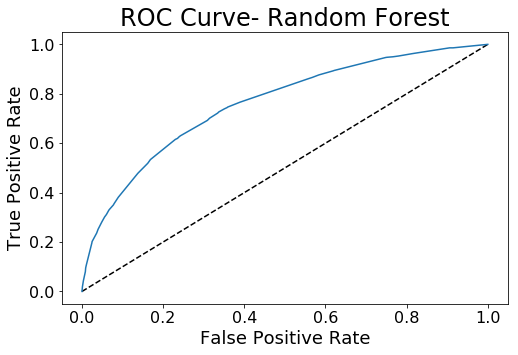

In [78]:
# ROC CURVE 

y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate',size=18)
plt.ylabel('True Positive Rate',size=18)
plt.title('ROC Curve- Random Forest', size=24)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.show()

###  Grid Search 

In [79]:
rfc = RandomForestClassifier(n_jobs=-1, random_state = 42)
steps = [ ('rfc', rfc)]
p_grid = [{"rfc__max_depth": [3, None],
              #"rfc__max_features": [1, 3, 10, 'auto'],
              "rfc__min_samples_split": [2, 3, 10],
              "rfc__min_samples_leaf": [1, 3, 10],
              "rfc__bootstrap": [True, False],
              "rfc__criterion": ["gini", "entropy"]}]

pipeline = Pipeline(steps)

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
nb= GridSearchCV(pipeline,param_grid=p_grid,cv=skf,scoring= "roc_auc",n_jobs=-1)

In [80]:
nb.fit(X_train, y_train)
nb.best_params_

{'rfc__bootstrap': True,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2}

In [81]:
# run random forest # run ra 
rfc_better = RandomForestClassifier(n_jobs=-1, random_state = 42 , bootstrap= True, criterion= 'gini',
 max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
rfc_better.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [82]:
training_accuracy = rfc_better.score(X_train, y_train)
test_accuracy = rfc_better.score(X_test, y_test)
auc =  metrics.roc_auc_score(y_test,rfc_better.predict_proba(X_test)[:,1])
f1score = metrics.f1_score(y_test, rfc_better.predict(X_test))

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("AUC on test data:          {:2f}".format(auc))
print("F1 Score on test data:     {:2f}".format(f1score))

Accuracy on training data: 0.714829
Accuracy on test data:     0.712562
AUC on test data:          0.759695
F1 Score on test data:     0.597250


##### Grid search found that the same as defaults works best 